In [201]:
#libraries
import numpy as np
import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import time


In [202]:
#import data
df = pd.read_csv("online_shoppers_intention.csv")


In [203]:
df.head(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [204]:
#data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [205]:
#statistical analysis
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


DATA CLEANING

In [206]:
#missing data points
print(df.isnull().sum())

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


In [207]:
#fixing data types
df.Revenue = df.Revenue.astype('int')
df.Weekend = df.Weekend.astype('int')
df.head(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,1,0


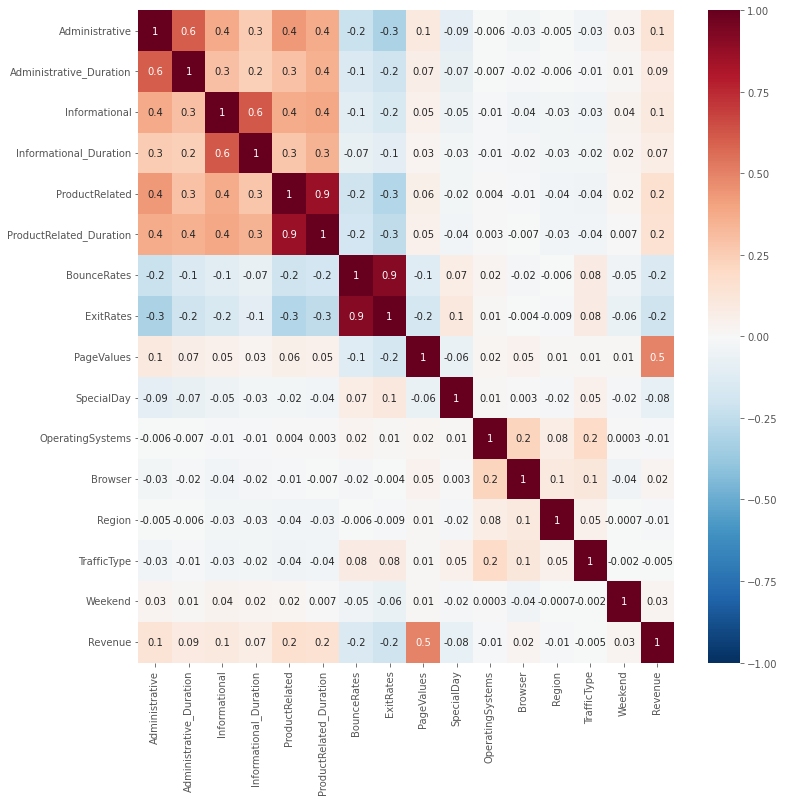

In [208]:

fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(df.corr(), annot=True, ax=ax, fmt='.1g', vmin=-1, vmax=1, center= 0, cmap='RdBu_r')
plt.show()


In [ ]:
#DATA PREPROCESSING
#data transformation
df = pd.get_dummies(data = df, columns=['Month', 'VisitorType'], drop_first=True)
df.shape
print(df.info())

In [ ]:
df.head()

In [ ]:
#Data Splitting
y = df['Revenue']
X = df.drop(['Revenue'], axis=1)

In [ ]:
X_train, X_valtest, y_train, y_valtest = train_test_split(X, y, test_size=0.3, random_state=101)
X_val, X_test, y_val, y_test = train_test_split(X_valtest, y_valtest, test_size=0.5, random_state=101)

In [ ]:
#data scaling
sc_X = StandardScaler()

Xsc_train = sc_X.fit_transform(X_train)
Xsc_val = sc_X.fit_transform(X_val)
Xsc_test = sc_X.fit_transform(X_test)

MODEL BUILDING

In [ ]:
#1.logistic regression
start=time.time()
lrm = LogisticRegression(random_state=0) 
lrm.fit(X_train,y_train)
lrm_pred = lrm.predict(X_val)
end =time.time()
conf_matrix = confusion_matrix(y_val, lrm_pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
TN = conf_matrix[0,0]
TP = conf_matrix[1,1]
FP = conf_matrix[0,1]
FN = conf_matrix[1,0]

accuracy = (TP+TN)/(TP+FN+TN+FP)
precision = TP/(TP+FP)
recall = TP/(FN+TP)
f1 = (2*precision*recall) / (precision+recall)
sensitivity = TPR_lrm = recall 
specifity = TN/(TN+FP)
FPR_lrm = FP/(FP+TN)
ErrorRate = 1 - accuracy
AUC_lrm = 1/2 - FPR_lrm/2 + TPR_lrm/2




print('Logistic Regression initial Performance:')
print('----------------------------------------')
print("Execution Time:", end-start)
print('Accuracy: %.3f'  %accuracy)
print('Precision: %.3f'  %precision)
print('Recall: %.3f'  %recall)
print('F1 Score: %.3f'  %f1)
print('Sensitivity: %.3f'  %sensitivity)
print('Specifity: %.3f' %specifity)
print('Error Rate: %.3f' %ErrorRate)
print('TPR:%.3f' %TPR_lrm)
print('FPR:%.3f' %FPR_lrm)
print('AUC:%.3f' %AUC_lrm)




In [ ]:
#2.KNN
start=time.time()
knn = KNeighborsClassifier(n_neighbors=5,weights='uniform',leaf_size=30,p=2) #default values
knn.fit(Xsc_train,y_train)
knn_pred = knn.predict(Xsc_val)

end =time.time()
conf_matrix = confusion_matrix(y_val, knn_pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
TN = conf_matrix[0,0]
TP = conf_matrix[1,1]
FP = conf_matrix[0,1]
FN = conf_matrix[1,0]

accuracy = (TP+TN)/(TP+FN+TN+FP)
precision = TP/(TP+FP)
recall = TP/(FN+TP)
f1 = (2*precision*recall) / (precision+recall)
sensitivity = TPR_knn = recall 
specifity = TN/(TN+FP)
FPR_knn = FP/(FP+TN)
ErrorRate = 1 - accuracy
AUC_knn = 1/2 - FPR_knn/2 + TPR_knn/2




print('KNN initial Performance:')
print('----------------------------------------')
print("Execution Time:", end-start)
print('Accuracy: %.3f'  %accuracy)
print('Precision: %.3f'  %precision)
print('Recall: %.3f'  %recall)
print('F1 Score: %.3f'  %f1)
print('Sensitivity: %.3f'  %sensitivity)
print('Specifity: %.3f' %specifity)
print('Error Rate: %.3f' %ErrorRate)
print('TPR:%.3f' %TPR_knn)
print('FPR:%.3f' %FPR_knn)
print('AUC:%.3f' %AUC_knn)


In [ ]:
#3.SVM
start=time.time()
svm = SVC(C=1.0,kernel='linear',degree=3) 
svm.fit(Xsc_train,y_train)
svm_pred = svm.predict(Xsc_val)

end =time.time()
conf_matrix = confusion_matrix(y_val, svm_pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
TN = conf_matrix[0,0]
TP = conf_matrix[1,1]
FP = conf_matrix[0,1]
FN = conf_matrix[1,0]

accuracy = (TP+TN)/(TP+FN+TN+FP)
precision = TP/(TP+FP)
recall = TP/(FN+TP)
f1 = (2*precision*recall) / (precision+recall)
sensitivity = TPR_svm = recall 
specifity = TN/(TN+FP)
FPR_svm = FP/(FP+TN)
ErrorRate = 1 - accuracy
AUC_svm = 1/2 - FPR_svm/2 + TPR_svm/2




print('SVM initial Performance:')
print('----------------------------------------')
print("Execution Time:", end-start)
print('Accuracy: %.3f'  %accuracy)
print('Precision: %.3f'  %precision)
print('Recall: %.3f'  %recall)
print('F1 Score: %.3f'  %f1)
print('Sensitivity: %.3f'  %sensitivity)
print('Specifity: %.3f' %specifity)
print('Error Rate: %.3f' %ErrorRate)
print('TPR:%.3f' %TPR_svm)
print('FPR:%.3f' %FPR_svm)
print('AUC:%.3f' %AUC_svm)

In [ ]:
#4.RBF SVM
start=time.time()
svm = SVC(C=1.0,kernel='rbf',degree=3) 
svm.fit(Xsc_train,y_train)
rsvm_pred = svm.predict(Xsc_val)

end =time.time()
conf_matrix = confusion_matrix(y_val, rsvm_pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
TN = conf_matrix[0,0]
TP = conf_matrix[1,1]
FP = conf_matrix[0,1]
FN = conf_matrix[1,0]

accuracy = (TP+TN)/(TP+FN+TN+FP)
precision = TP/(TP+FP)
recall = TP/(FN+TP)
f1 = (2*precision*recall) / (precision+recall)
sensitivity = TPR_rsvm = recall 
specifity = TN/(TN+FP)
FPR_rsvm = FP/(FP+TN)
ErrorRate = 1 - accuracy
AUC_rsvm = 1/2 - FPR_rsvm/2 + TPR_rsvm/2




print('RBF SVM initial Performance:')
print('----------------------------------------')
print("Execution Time:", end-start)
print('Accuracy: %.3f'  %accuracy)
print('Precision: %.3f'  %precision)
print('Recall: %.3f'  %recall)
print('F1 Score: %.3f'  %f1)
print('Sensitivity: %.3f'  %sensitivity)
print('Specifity: %.3f' %specifity)
print('Error Rate: %.3f' %ErrorRate)
print('TPR:%.3f' %TPR_rsvm)
print('FPR:%.3f' %FPR_rsvm)
print('AUC:%.3f' %AUC_rsvm)

In [ ]:
#5.Naive Bayes
start=time.time()
nbm = GaussianNB()
nbm.fit(X_train,y_train)
nbm_pred = nbm.predict(X_val)

end =time.time()
conf_matrix = confusion_matrix(y_val, nbm_pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
TN = conf_matrix[0,0]
TP = conf_matrix[1,1]
FP = conf_matrix[0,1]
FN = conf_matrix[1,0]

accuracy = (TP+TN)/(TP+FN+TN+FP)
precision = TP/(TP+FP)
recall = TP/(FN+TP)
f1 = (2*precision*recall) / (precision+recall)
sensitivity = TPR_nbm = recall 
specifity = TN/(TN+FP)
FPR_nbm = FP/(FP+TN)
ErrorRate = 1 - accuracy
AUC_nbm = 1/2 - FPR_nbm/2 + TPR_nbm/2




print('Naive Bayes initial Performance:')
print('----------------------------------------')
print("Execution Time:", end-start)
print('Accuracy: %.3f'  %accuracy)
print('Precision: %.3f'  %precision)
print('Recall: %.3f'  %recall)
print('F1 Score: %.3f'  %f1)
print('Sensitivity: %.3f'  %sensitivity)
print('Specifity: %.3f' %specifity)
print('Error Rate: %.3f' %ErrorRate)
print('TPR:%.3f' %TPR_nbm)
print('FPR:%.3f' %FPR_nbm)
print('AUC:%.3f' %AUC_nbm)

In [ ]:
#6.Decision Tree(Gini Index)
start=time.time()
clf_gini = DecisionTreeClassifier(criterion = "gini",
            random_state = 100,max_depth=3, min_samples_leaf=5)
clf_gini.fit(X_train,y_train)
dt_pred = clf_gini.predict(X_val)

end =time.time()
conf_matrix = confusion_matrix(y_val, dt_pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
TN = conf_matrix[0,0]
TP = conf_matrix[1,1]
FP = conf_matrix[0,1]
FN = conf_matrix[1,0]

accuracy = (TP+TN)/(TP+FN+TN+FP)
precision = TP/(TP+FP)
recall = TP/(FN+TP)
f1 = (2*precision*recall) / (precision+recall)
sensitivity = TPR_clf_ginni = recall 
specifity = TN/(TN+FP)
FPR_clf_ginni = FP/(FP+TN)
ErrorRate = 1 - accuracy
AUC_clf_ginni = 1/2 - FPR_clf_ginni/2 + TPR_clf_ginni/2




print('Decision Tree Gini index initial Performance:')
print('----------------------------------------')
print("Execution Time:", end-start)
print('Accuracy: %.3f'  %accuracy)
print('Precision: %.3f'  %precision)
print('Recall: %.3f'  %recall)
print('F1 Score: %.3f'  %f1)
print('Sensitivity: %.3f'  %sensitivity)
print('Specifity: %.3f' %specifity)
print('Error Rate: %.3f' %ErrorRate)
print('TPR:%.3f' %TPR_clf_ginni)
print('FPR:%.3f' %FPR_clf_ginni)
print('AUC:%.3f' %AUC_clf_ginni)

In [ ]:
#7.Decision Tree(information gain)
start=time.time()
clf_entropy = DecisionTreeClassifier(criterion = "entropy",
            random_state = 100,max_depth=3, min_samples_leaf=5)
clf_entropy.fit(X_train,y_train)
dti_pred = clf_entropy.predict(X_val)

end =time.time()
conf_matrix = confusion_matrix(y_val, dti_pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
TN = conf_matrix[0,0]
TP = conf_matrix[1,1]
FP = conf_matrix[0,1]
FN = conf_matrix[1,0]

accuracy = (TP+TN)/(TP+FN+TN+FP)
precision = TP/(TP+FP)
recall = TP/(FN+TP)
f1 = (2*precision*recall) / (precision+recall)
sensitivity = TPR_clf_entropy = recall 
specifity = TN/(TN+FP)
FPR_clf_entropy = FP/(FP+TN)
ErrorRate = 1 - accuracy
AUC_clf_entropy = 1/2 - FPR_clf_entropy/2 + TPR_clf_entropy/2




print('Decision Tree Information Gain initial Performance:')
print('----------------------------------------')
print("Execution Time:", end-start)
print('Accuracy: %.3f'  %accuracy)
print('Precision: %.3f'  %precision)
print('Recall: %.3f'  %recall)
print('F1 Score: %.3f'  %f1)
print('Sensitivity: %.3f'  %sensitivity)
print('Specifity: %.3f' %specifity)
print('Error Rate: %.3f' %ErrorRate)
print('TPR:%.3f' %TPR_clf_entropy)
print('FPR:%.3f' %FPR_clf_entropy)
print('AUC:%.3f' %AUC_clf_entropy)

In [ ]:
#8.Random Forest
start=time.time()
rfm = RandomForestClassifier(n_estimators=100,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='auto',
    bootstrap=True) #default parameters
rfm.fit(X_train,y_train)
rfm_pred = rfm.predict(X_val)

end =time.time()
conf_matrix = confusion_matrix(y_val, rfm_pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
TN = conf_matrix[0,0]
TP = conf_matrix[1,1]
FP = conf_matrix[0,1]
FN = conf_matrix[1,0]

accuracy = (TP+TN)/(TP+FN+TN+FP)
precision = TP/(TP+FP)
recall = TP/(FN+TP)
f1 = (2*precision*recall) / (precision+recall)
sensitivity = TPR_rfm = recall 
specifity = TN/(TN+FP)
FPR_rfm = FP/(FP+TN)
ErrorRate = 1 - accuracy
AUC_rfm = 1/2 - FPR_rfm/2 + TPR_rfm/2




print('Random forest initial Performance:')
print('----------------------------------------')
print("Execution Time:", end-start)
print('Accuracy: %.3f'  %accuracy)
print('Precision: %.3f'  %precision)
print('Recall: %.3f'  %recall)
print('F1 Score: %.3f'  %f1)
print('Sensitivity: %.3f'  %sensitivity)
print('Specifity: %.3f' %specifity)
print('Error Rate: %.3f' %ErrorRate)
print('TPR:%.3f' %TPR_rfm)
print('FPR:%.3f' %FPR_rfm)
print('AUC:%.3f' %AUC_rfm)

In [ ]:
#9. Gradient Boost
start=time.time()
gbm = GradientBoostingClassifier(loss='deviance',
    learning_rate=0.1,
    n_estimators=100,
    subsample=1.0,
    criterion='friedman_mse',
    min_samples_split=2,
    min_samples_leaf=1,
    max_depth=3,
    max_features=None) #default parameters
gbm.fit(X_train,y_train)
gbm_pred = gbm.predict(X_val)

end =time.time()
conf_matrix = confusion_matrix(y_val, gbm_pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
TN = conf_matrix[0,0]
TP = conf_matrix[1,1]
FP = conf_matrix[0,1]
FN = conf_matrix[1,0]

accuracy = (TP+TN)/(TP+FN+TN+FP)
precision = TP/(TP+FP)
recall = TP/(FN+TP)
f1 = (2*precision*recall) / (precision+recall)
sensitivity = TPR_gbm = recall 
specifity = TN/(TN+FP)
FPR_gbm = FP/(FP+TN)
ErrorRate = 1 - accuracy
AUC_gbm = 1/2 - FPR_gbm/2 + TPR_gbm/2




print('Gradient Boost initial Performance:')
print('----------------------------------------')
print("Execution Time:", end-start)
print('Accuracy: %.3f'  %accuracy)
print('Precision: %.3f'  %precision)
print('Recall: %.3f'  %recall)
print('F1 Score: %.3f'  %f1)
print('Sensitivity: %.3f'  %sensitivity)
print('Specifity: %.3f' %specifity)
print('Error Rate: %.3f' %ErrorRate)
print('TPR:%.3f' %TPR_gbm)
print('FPR:%.3f' %FPR_gbm)
print('AUC:%.3f' %AUC_gbm)

In [ ]:
#10.AdaBoost
start=time.time()
abm = AdaBoostClassifier(base_estimator=None,
    n_estimators=50,
    learning_rate=1.0,
    algorithm='SAMME.R',
    random_state=None) 
abm.fit(X_train,y_train)
abm_pred = abm.predict(X_val)

end =time.time()
conf_matrix = confusion_matrix(y_val, abm_pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
TN = conf_matrix[0,0]
TP = conf_matrix[1,1]
FP = conf_matrix[0,1]
FN = conf_matrix[1,0]

accuracy = (TP+TN)/(TP+FN+TN+FP)
precision = TP/(TP+FP)
recall = TP/(FN+TP)
f1 = (2*precision*recall) / (precision+recall)
sensitivity = TPR_abm = recall 
specifity = TN/(TN+FP)
FPR_abm = FP/(FP+TN)
ErrorRate = 1 - accuracy
AUC_abm = 1/2 - FPR_abm/2 + TPR_abm/2




print('AdaBoost initial Performance:')
print('----------------------------------------')
print("Execution Time:", end-start)
print('Accuracy: %.3f'  %accuracy)
print('Precision: %.3f'  %precision)
print('Recall: %.3f'  %recall)
print('F1 Score: %.3f'  %f1)
print('Sensitivity: %.3f'  %sensitivity)
print('Specifity: %.3f' %specifity)
print('Error Rate: %.3f' %ErrorRate)
print('TPR:%.3f' %TPR_abm)
print('FPR:%.3f' %FPR_abm)
print('AUC:%.3f' %AUC_abm)

In [ ]:
#ROC Curve
fpr_nb, tpr_nb, threshold_nb = metrics.roc_curve(y_val, nbm_pred)
roc_auc_nb = metrics.auc(fpr_nb, tpr_nb)
fpr_knn, tpr_knn, threshold_knn = metrics.roc_curve(y_val, knn_pred)
roc_auc_knn = metrics.auc(fpr_knn, tpr_knn)
fpr_rsvm, tpr_rsvm, threshold_rsvm = metrics.roc_curve(y_val, rsvm_pred)
roc_auc_rsvm = metrics.auc(fpr_rsvm, tpr_rsvm)
fpr_svm, tpr_svm, threshold_svm = metrics.roc_curve(y_val, svm_pred)
roc_auc_svm = metrics.auc(fpr_svm, tpr_svm)
fpr_lrm, tpr_lrm, threshold_lrm = metrics.roc_curve(y_val, lrm_pred)
roc_auc_lrm = metrics.auc(fpr_lrm, tpr_lrm)
fpr_rfm, tpr_rfm, threshold_rfm = metrics.roc_curve(y_val, rfm_pred)
roc_auc_rfm = metrics.auc(fpr_rfm, tpr_rfm)
fpr_gbm, tpr_gbm, threshold_gbm = metrics.roc_curve(y_val, gbm_pred)
roc_auc_gbm = metrics.auc(fpr_gbm, tpr_gbm)
fpr_abm, tpr_abm, threshold_abm = metrics.roc_curve(y_val, abm_pred)
roc_auc_abm = metrics.auc(fpr_abm, tpr_abm)
fpr_clf_entropy, tpr_clf_entropy,threshold_clf_entropy = metrics.roc_curve(y_val,dti_pred)
roc_auc_clf_entropy=metrics.auc(fpr_clf_entropy,tpr_clf_entropy)
fpr_clf_ginni, tpr_clf_ginni,threshold_clf_ginni = metrics.roc_curve(y_val,dt_pred)
roc_auc_clf_ginni=metrics.auc(fpr_clf_ginni,tpr_clf_ginni)



fig = plt.figure(figsize=(8, 4))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_nb, tpr_nb, 'b', label = 'AUC NB = %0.2f' % roc_auc_nb)
plt.plot(fpr_knn, tpr_knn, 'y', label = 'AUC KNN = %0.2f' % roc_auc_knn)
plt.plot(fpr_rsvm, tpr_rsvm, 'r', label = 'AUC RSVM = %0.2f' % roc_auc_rsvm)
plt.plot(fpr_svm, tpr_svm, 'b', label = 'AUC SVM = %0.2f' % roc_auc_svm)
plt.plot(fpr_lrm, tpr_lrm, 'g', label = 'AUC LR = %0.2f' % roc_auc_lrm)
plt.plot(fpr_rfm, tpr_rfm, 'k', label = 'AUC RF = %0.2f' % roc_auc_rfm)
plt.plot(fpr_gbm, tpr_gbm, 'c', label = 'AUC GB = %0.2f' % roc_auc_gbm)
plt.plot(fpr_abm, tpr_abm, 'm', label = 'AUC AB = %0.2f' % roc_auc_abm)
plt.plot(fpr_clf_entropy,tpr_clf_entropy,'r',label='AUC DTIG = %0.2f' %roc_auc_clf_entropy)
plt.plot(fpr_clf_ginni,tpr_clf_ginni,'y',label='AUC DTGI = %0.2f' %roc_auc_clf_ginni)

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'w--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.tight_layout()
plt.show()